# Customer Analysis #

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load Data

In [3]:
df = pd.read_csv('D:/data_science for marketing/data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [4]:
df.shape

(9134, 24)

In [5]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 2. Analytics on Engaged Customers

#### - Overall Engagement Rate

In [7]:
df['engaged'] = df['Response'].apply(lambda x:0 if x == 'No'
                                 else 1)

In [8]:
df.groupby('Response').count()['Customer']/df.shape[0]*100

Response
No     85.679877
Yes    14.320123
Name: Customer, dtype: float64

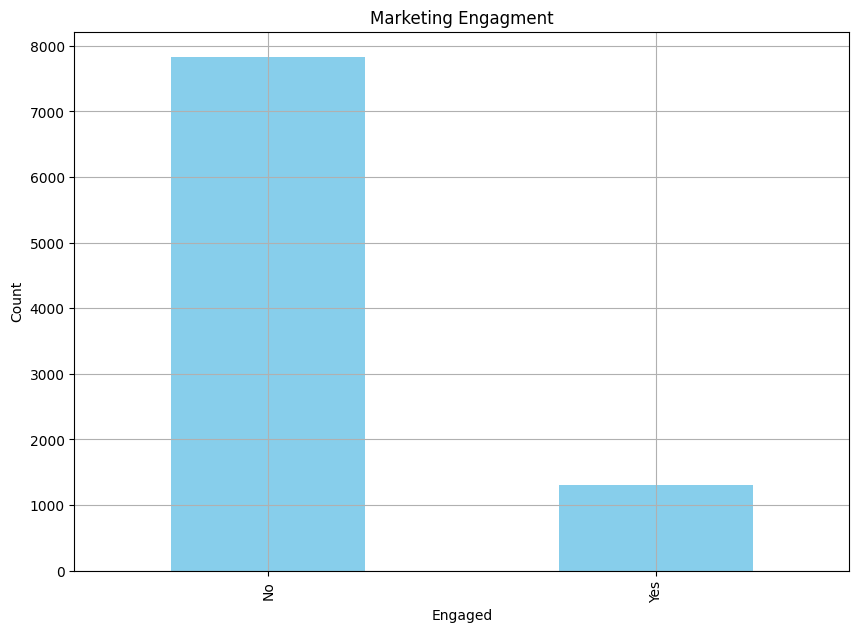

In [9]:
ax = df.groupby('Response').count()['Customer'].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Marketing Engagment'
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show()

In [10]:
df.groupby('Response').count()['Customer']/df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

#### - Engagement Rates by Offer Type

In [11]:
by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type'
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

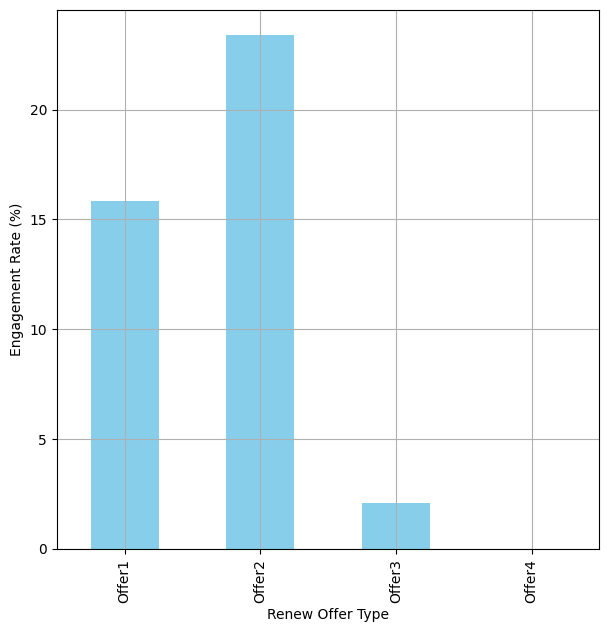

In [12]:
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

#### - Offer Type & Vehicle Class

In [13]:
pd.pivot_table(df,values='Response',index='Renew Offer Type',columns='Vehicle Class',aggfunc=len).fillna(0.0)

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,1797,68,89,892,227,679
Offer2,1533,41,47,480,154,671
Offer3,745,31,27,276,68,285
Offer4,546,23,21,148,35,251


In [14]:
by_offer_type_df1 = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df1

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [15]:
by_offer_type_df1 = by_offer_type_df1.unstack().fillna(0)
by_offer_type_df1

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


In [16]:
by_offer_type_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Renew Offer Type', 'Sales Channel'
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type  Sales Channel
Offer1            Agent            0.089552
                  Branch           0.044776
                  Call Center      0.011194
                  Web              0.012793
Offer2            Agent            0.106630
                  Branch           0.043062
                  Call Center      0.051265
                  Web              0.032809
Offer3            Agent            0.012570
                  Web              0.008380
Name: Customer, dtype: float64

In [17]:
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Sales Channel,Agent,Branch,Call Center,Web
Renew Offer Type,,,,
Offer1,0.089552,0.044776,0.011194,0.012793
Offer2,0.106630,0.043062,0.051265,0.032809
Offer3,0.012570,0.000000,0.000000,0.008380


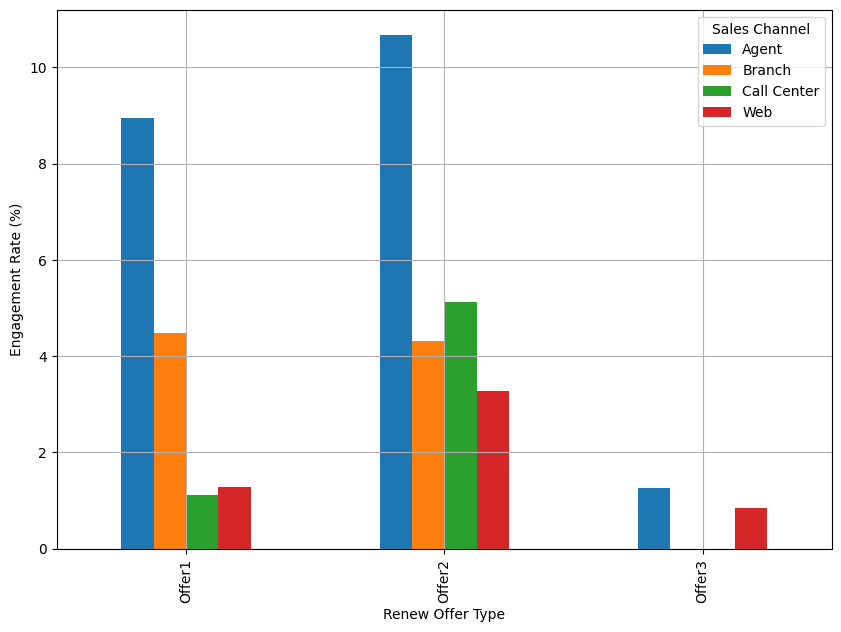

In [18]:
ax = (by_offer_type_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

#### - Engagement Rates by Sales Channel

In [21]:
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel','Renew Offer Type'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel  Renew Offer Type
Agent          Offer1              0.096635
               Offer2              0.089733
               Offer3              0.005177
Branch         Offer1              0.065446
               Offer2              0.049085
Call Center    Offer1              0.023796
               Offer2              0.084986
Web            Offer1              0.036226
               Offer2              0.072453
               Offer3              0.009057
Name: Customer, dtype: float64

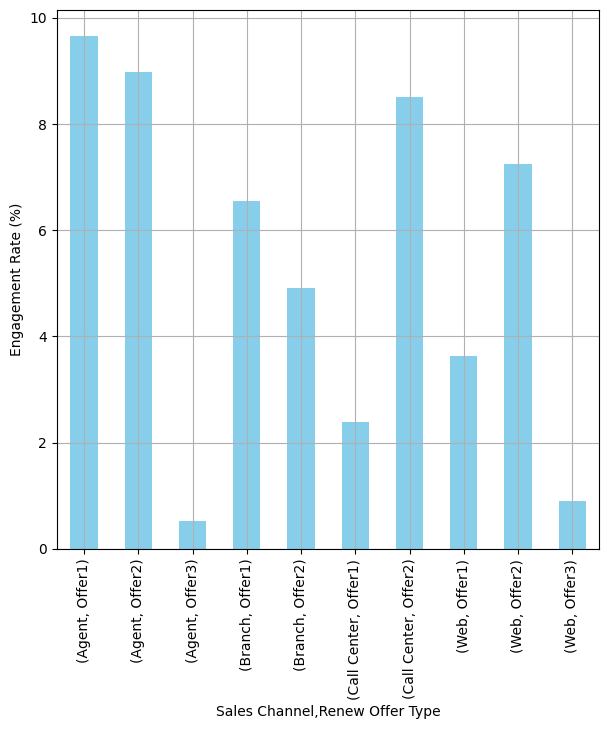

In [22]:
ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

#### - Sales Channel & Vehicle Size

In [ ]:
by_sales_channel_df =

by_sales_channel_df

In [ ]:
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


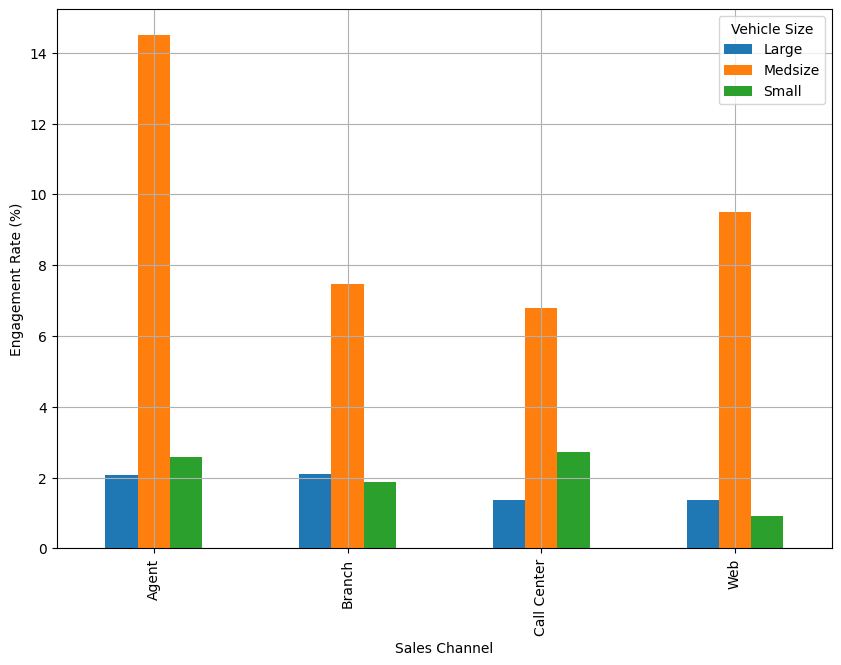

In [ ]:
ax = (by_sales_channel_df*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

#### - Engagement Rates by Months Since Policy Inception

In [ ]:
by_months_since_inception_df =

by_months_since_inception_df.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
        ...    
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.692308
Name: Response, Length: 100, dtype: float64

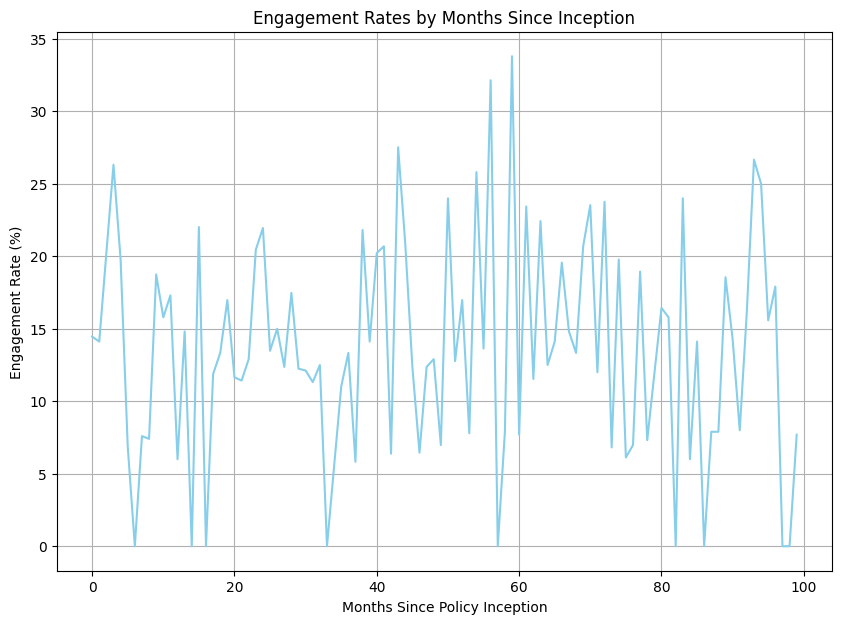

In [ ]:
ax = by_months_since_inception_df.fillna(0).plot(
    figsize=(10, 7),
    title='Engagement Rates by Months Since Inception',
    grid=True,
    color='skyblue'
)

ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate (%)')

plt.show()

# 3. Customer Segmentation by CLV & Months Since Policy Inception

In [ ]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [ ]:
df['CLV Segment'] = df['Customer Lifetime Value'].apply(
    lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low'
)

In [ ]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [ ]:
df['Policy Age Segment'] =df['Months Since Policy Inception'].apply(lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'low')

In [ ]:
df['Policy Age Segment'].describe()

count     9134
unique       2
top        low
freq      4632
Name: Policy Age Segment, dtype: object

In [ ]:
df.head()

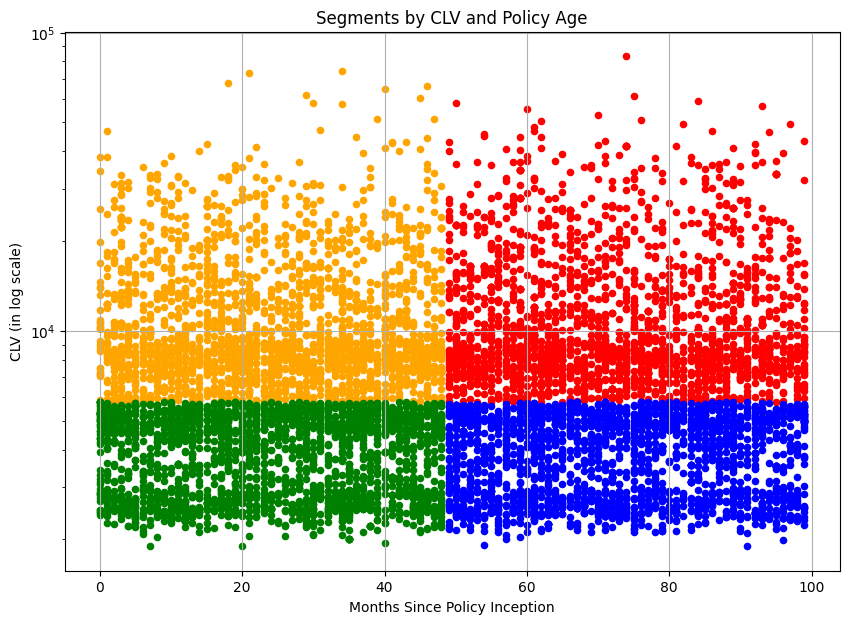

In [ ]:
ax = df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='red'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='blue'
)

df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='orange'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='green',
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')

ax.set_title('Segments by CLV and Policy Age')

plt.show()

In [ ]:
engagment_rates_by_segment_df = df.loc[
    df['Response'] == 'Yes'
].groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']/df.groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']

engagment_rates_by_segment_df

CLV Segment  Policy Age Segment
High         High                  0.138728
             low                   0.132067
Low          High                  0.162450
             low                   0.139957
Name: Customer, dtype: float64

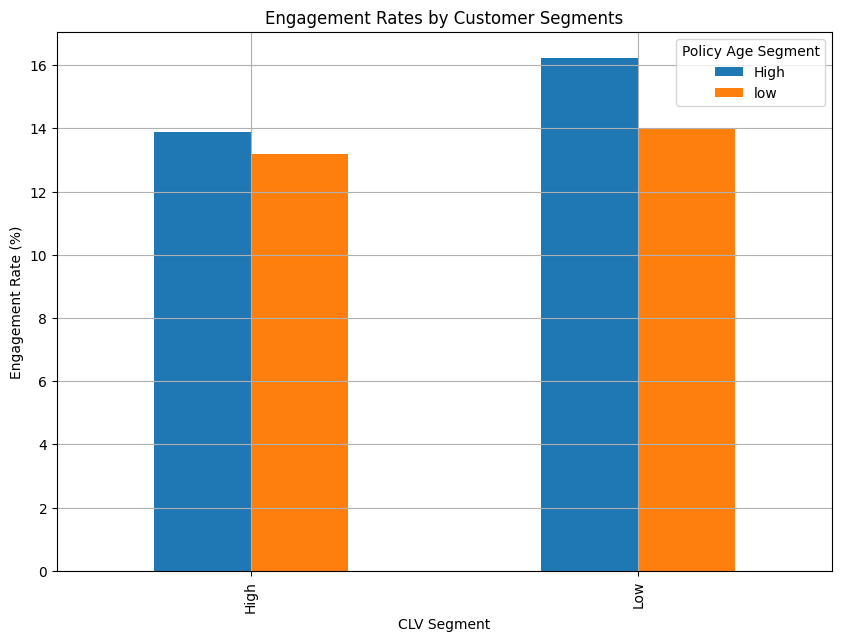

In [ ]:
ax = (engagment_rates_by_segment_df.unstack()*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')

plt.show()